In [1]:
import numpy as np

In [2]:
import os

In [3]:
os.getcwd()

'/Users/apple/Documents/ML/Intro_of_ML'

#### Import Script 

In [4]:
import sys

In [5]:
sys.path.append('ud120-projects/choose_your_own/')

In [6]:
from prep_terrain_data import makeTerrainData

In [7]:
from class_vis import prettyPicture

#### Processing 

In [8]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [9]:
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

In [10]:
### Initial visualization
import matplotlib.pyplot as plt
%matplotlib inline

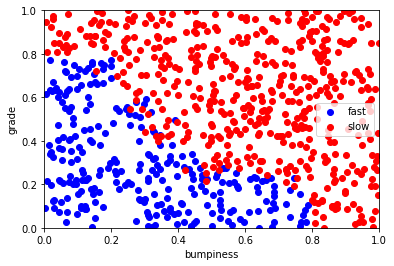

In [11]:
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.scatter(bumpy_fast,grade_fast,c='b',label='fast')
plt.scatter(bumpy_slow,grade_slow,c='r',label='slow')
plt.legend()
plt.xlabel('bumpiness')
plt.ylabel('grade')
plt.show()

In [12]:
len(features_train)

750

#### Model 

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn.metrics import accuracy_score

* KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
clf=KNeighborsClassifier(algorithm='auto',leaf_size=20)

In [17]:
clf.fit(features_train,labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
clf.score(features_test,labels_test)

0.92000000000000004

In [19]:
pred=clf.predict(features_test)

In [20]:
param_grid={'n_neighbors':[4,5,6],
            'weights':['uniform','distance'],
            'leaf_size':[20,30,40,50],
            'p':[1,2]}

In [21]:
clf_CV=GridSearchCV(estimator=clf,param_grid=param_grid,cv=5)

In [22]:
clf_CV.fit(features_train,labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [4, 5, 6], 'weights': ['uniform', 'distance'], 'leaf_size': [20, 30, 40, 50], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
clf_CV.grid_scores_

/Users/apple/anaconda/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94267, std: 0.01489, params: {'n_neighbors': 4, 'weights': 'uniform', 'leaf_size': 20, 'p': 1},
 mean: 0.93867, std: 0.01757, params: {'n_neighbors': 4, 'weights': 'distance', 'leaf_size': 20, 'p': 1},
 mean: 0.94533, std: 0.01946, params: {'n_neighbors': 4, 'weights': 'uniform', 'leaf_size': 20, 'p': 2},
 mean: 0.93867, std: 0.01904, params: {'n_neighbors': 4, 'weights': 'distance', 'leaf_size': 20, 'p': 2},
 mean: 0.95333, std: 0.00735, params: {'n_neighbors': 5, 'weights': 'uniform', 'leaf_size': 20, 'p': 1},
 mean: 0.94533, std: 0.01757, params: {'n_neighbors': 5, 'weights': 'distance', 'leaf_size': 20, 'p': 1},
 mean: 0.94933, std: 0.01087, params: {'n_neighbors': 5, 'weights': 'uniform', 'leaf_size': 20, 'p': 2},
 mean: 0.94133, std: 0.02038, params: {'n_neighbors': 5, 'weights': 'distance', 'leaf_size': 20, 'p': 2},
 mean: 0.94667, std: 0.01572, params: {'n_neighbors': 6, 'weights': 'uniform', 'leaf_size': 20, 'p': 1},
 mean: 0.95067, std: 0.01367, params: {'n_neighbors

In [24]:
clf_CV.best_params_

{'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

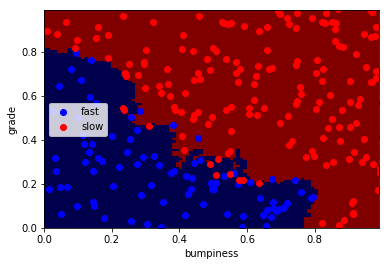

In [25]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

* Adaboost

In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [27]:
clf=AdaBoostClassifier(n_estimators=40,learning_rate=0.4,random_state=1)

In [28]:
clf.fit(features_train,labels_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.4, n_estimators=40, random_state=1)

In [29]:
clf.score(features_test,labels_test)

0.92800000000000005

In [30]:
param_grid={'n_estimators':[40,50,60],
            'learning_rate':[0.2,0.4,0.6,0.8,1],
            'algorithm':['SAMME.R','SAMME']}

In [31]:
clf2_CV=GridSearchCV(clf,param_grid=param_grid,cv=5)

In [32]:
clf2_CV.fit(features_train,labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.4, n_estimators=40, random_state=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 50, 60], 'learning_rate': [0.2, 0.4, 0.6, 0.8, 1], 'algorithm': ['SAMME.R', 'SAMME']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
clf2_CV.grid_scores_

/Users/apple/anaconda/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.95733, std: 0.01247, params: {'n_estimators': 40, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'},
 mean: 0.95600, std: 0.01247, params: {'n_estimators': 50, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'},
 mean: 0.95733, std: 0.00815, params: {'n_estimators': 60, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'},
 mean: 0.96133, std: 0.00499, params: {'n_estimators': 40, 'learning_rate': 0.4, 'algorithm': 'SAMME.R'},
 mean: 0.95867, std: 0.00786, params: {'n_estimators': 50, 'learning_rate': 0.4, 'algorithm': 'SAMME.R'},
 mean: 0.95867, std: 0.00786, params: {'n_estimators': 60, 'learning_rate': 0.4, 'algorithm': 'SAMME.R'},
 mean: 0.95733, std: 0.00808, params: {'n_estimators': 40, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'},
 mean: 0.95600, std: 0.01086, params: {'n_estimators': 50, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'},
 mean: 0.95467, std: 0.01224, params: {'n_estimators': 60, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'},
 mean: 0.95733, std: 0.01162, params: {'n_esti

In [34]:
clf2_CV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.4, 'n_estimators': 40}

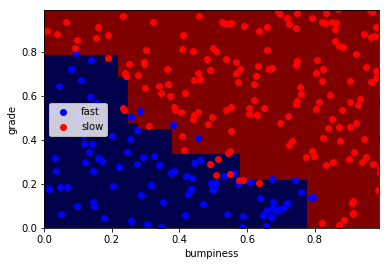

In [35]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

* Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf=RandomForestClassifier(random_state=1)

In [38]:
clf.fit(features_train,labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [39]:
clf.score(features_test,labels_test)

0.92000000000000004

In [40]:
param_grid={'n_estimators':[20,30,40,50],
            'criterion':['gini','entropy'],
            'max_depth':[3,4,5,6]}

In [41]:
clf3_CV=GridSearchCV(clf,param_grid=param_grid,cv=5)

In [42]:
clf3_CV.fit(features_train,labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 30, 40, 50], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
clf3_CV.grid_scores_

/Users/apple/anaconda/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94533, std: 0.01552, params: {'n_estimators': 20, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.94533, std: 0.01299, params: {'n_estimators': 30, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.94400, std: 0.01242, params: {'n_estimators': 40, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.94400, std: 0.00815, params: {'n_estimators': 50, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.95200, std: 0.00782, params: {'n_estimators': 20, 'criterion': 'gini', 'max_depth': 4},
 mean: 0.94933, std: 0.01434, params: {'n_estimators': 30, 'criterion': 'gini', 'max_depth': 4},
 mean: 0.95333, std: 0.00939, params: {'n_estimators': 40, 'criterion': 'gini', 'max_depth': 4},
 mean: 0.94933, std: 0.01163, params: {'n_estimators': 50, 'criterion': 'gini', 'max_depth': 4},
 mean: 0.94667, std: 0.01688, params: {'n_estimators': 20, 'criterion': 'gini', 'max_depth': 5},
 mean: 0.94933, std: 0.01373, params: {'n_estimators': 30, 'criterion': 'gini', 'max_depth': 5},
 mean: 0.95067, std: 0.00901, 

In [44]:
clf3_CV.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50}

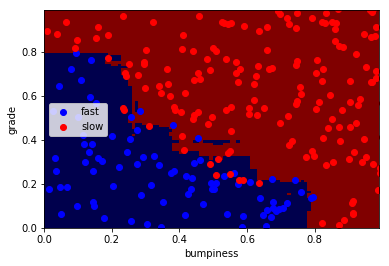

In [45]:
try:
    prettyPicture(clf,features_test,labels_test)
except NameError:
    pass

#### The best model I have is to use Adaboost with parameter:  'algorithm': 'SAMME.R', 'learning_rate': 0.4, 'n_estimators': 40